# Analyzing Movie Reviews

## Data

The dataset is stored in the fandango_score_comparison.csv file. It contains information on how major movie review services rated movies. The data originally came from FiveThirtyEight.

Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

* RottenTomatoes - 0-100, in increments of 1.
* Metacritic - 0-100, in increments of 1.
* IMDB - 0-10, in increments of .1.
* Fandango - 0-5, in increments of .5.

Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:

* FILM -- the name of the movie.
* RottenTomatoes -- the RottenTomatoes (RT) critic score.
* RottenTomatoes_User -- the RT user score.
* Metacritic -- the Metacritic critic score.
* Metacritic_User -- the Metacritic user score.
* IMDB -- the IMDB score given to the movie.
* Fandango_Stars -- the number of stars Fandango gave the movie.

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix _round is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.

In [3]:
import pandas as pd

In [4]:
movies = pd.read_csv('fandango_score_comparison.csv')

In [5]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


## Histograms

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

(array([  1.,   2.,  20.,  14.,   0.,  22.,  27.,  20.,  25.,  15.]),
 array([ 0.5,  0.9,  1.3,  1.7,  2.1,  2.5,  2.9,  3.3,  3.7,  4.1,  4.5]),
 <a list of 10 Patch objects>)

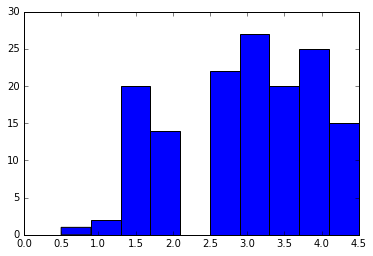

In [8]:
plt.hist(movies['Metacritic_norm_round'])

(array([ 12.,   0.,  27.,   0.,   0.,  41.,   0.,  55.,   0.,  11.]),
 array([ 3. ,  3.2,  3.4,  3.6,  3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ]),
 <a list of 10 Patch objects>)

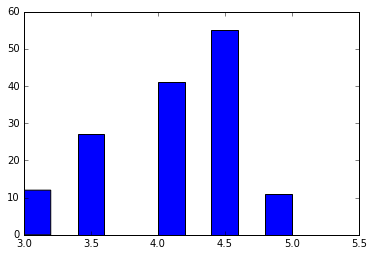

In [9]:
plt.hist(movies['Fandango_Stars'])

### Findings
What can be seen is that Fandango ratings do not go below a rating of 3 and hence all concentrating at higher movie ratings cedntering aroung 4.0 and 4.5. This is contrasted with the Metacritic data, where we can see a more distributed spread of data mainly centered around 3 and 4 rating.

## Mean, Median and Standard Deviation

In [10]:
import numpy as np

f_mean = np.mean(movies['Fandango_Stars'])
m_mean = np.mean(movies['Metacritic_norm_round'])

print(f_mean)
print(m_mean)

4.08904109589
2.97260273973


In [11]:
f_median = np.median(movies['Fandango_Stars'])
m_median = np.median(movies['Metacritic_norm_round'])

print(f_median)
print(m_median)

4.0
3.0


In [12]:
f_stdev = np.std(movies['Fandango_Stars'])
m_stdev = np.std(movies['Metacritic_norm_round'])

print(f_stdev)
print(m_stdev)

0.53853216127
0.987561029704


### Metacritic vs. Fandango Methodologies

Metacritic's website give details on how scores are calcuated using weighted averages based on quality and status of the critics who score the movies. Fandango's website provides no detail on this and is not transparent. 

### Differences between Metacritic and Fandango

The data suggests that Fandango's rating are inflated to provide mvoies with better ratings. The Metacritic mean is lower than the median as there is a few lower values dragging down the median. The Fandango mena is higher then the median as there a few large values pulling up the mean.

Fandango's standard dveiation is lower then Meactiric as there is less varability in the data, as can be seen from the graphs above. 

Fandango's data seems to be inflated with less vaiability in constrast to Meactiric's data where there is more variability in the data and doesn't appear to have inflated scores. This would explain the Fandango's higher mean.



## Scatter Plots

In [13]:
import seaborn as sns

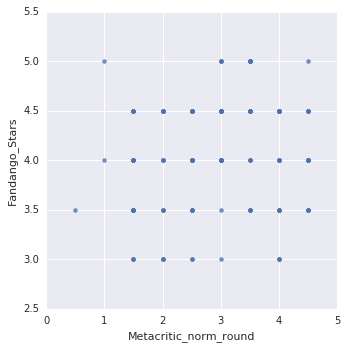

In [14]:
sns.lmplot(x = 'Metacritic_norm_round' , y = 'Fandango_Stars', data=movies, fit_reg=False)

In [15]:
movies['fm_diff'] = np.abs(movies['Metacritic_norm_round'] - movies['Fandango_Stars'])

In [16]:
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5,1.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5,1.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5,2.0
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5,2.0


In [17]:
movies.sort_values('fm_diff', ascending=False).head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


## Correlations

In [18]:
from scipy.stats.stats import pearsonr

In [22]:
r_value, p_value = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])

In [23]:
r_value

0.17844919073895918

### Correlation between Fandango & Metacritic
The r-value is low signifying that there is little correlation between the two sites ratings. This reaffirms the suspicion that Fandangos ratings are inlfated and fundamently different from Metacritic.

In [24]:
from scipy.stats.stats import linregress

In [29]:
slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

In [30]:
print(slope)
print(intercept)

0.0973110779739
3.7997739189


In [31]:
pred_3 = 3 * slope + intercept

In [32]:
pred_3

4.0917071528212041

## Finding Residuals

In [33]:
pred_1 = 1 * slope + intercept
pred_1

3.897084996873347

In [34]:
pred_5 = 5 * slope + intercept
pred_5

4.2863293087690604

(1, 5)

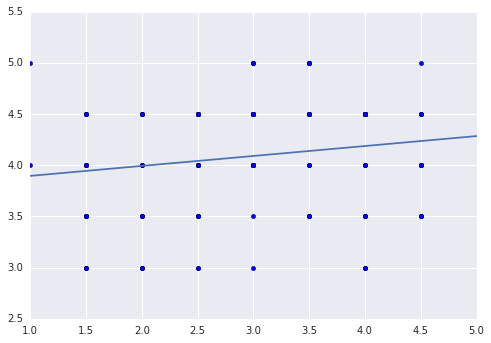

In [35]:
plt.scatter(movies['Metacritic_norm_round'], movies['Fandango_Stars'])
plt.plot([1,5], [pred_1, pred_5])
plt.xlim(1,5)
